In [5]:
%matplotlib inline
from matplotlib import style
import matplotlib.pyplot as plt
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [6]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [7]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [8]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [10]:
from sqlalchemy import create_engine
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
Base.prepare(engine, reflect=True)

# reflect the tables
# View the classes (tables) found by reflection
print(Base.classes.keys())

['measurement', 'station']


/var/folders/zp/nkyn8k555fg5b0nrdcqt6ydm0000gn/T/ipykernel_17168/3106951588.py:6: SADeprecationWarning: The AutomapBase.prepare.reflect parameter is deprecated and will be removed in a future release.  Reflection is enabled when AutomapBase.prepare.autoload_with is passed.
  Base.prepare(engine, reflect=True)


In [11]:
# View all of the classes that automap found
# View all the classes (tables) found by reflection
for table_name in Base.classes.keys():
    print(table_name)

measurement
station


In [12]:
# View all of the classes that automap found
# View all the classes (tables) found by reflection
for table_name in Base.classes.keys():
    print(table_name)

measurement
station


In [14]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [15]:
from sqlalchemy.orm import sessionmaker
# Create our session (link) from Python to the DB
Session = sessionmaker(bind=engine)
session = Session()

# Exploratory Precipitation Analysis

In [16]:
# Find the most recent date in the data set.
most_recent_date = session.query(func.max(Measurement.date)).scalar()

print("The most recent date in the dataset is:", most_recent_date)

The most recent date in the dataset is: 2017-08-23


/var/folders/zp/nkyn8k555fg5b0nrdcqt6ydm0000gn/T/ipykernel_17168/3167849590.py:13: SADeprecationWarning: The AutomapBase.prepare.reflect parameter is deprecated and will be removed in a future release.  Reflection is enabled when AutomapBase.prepare.autoload_with is passed.
  Base.prepare(engine, reflect=True)


<Figure size 10000x10000 with 0 Axes>

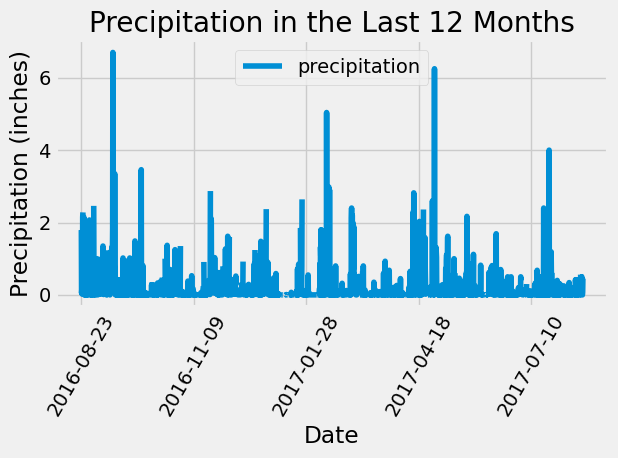

In [18]:
# import matplotlib.pyplot as plt
# import numpy as np
# import pandas as pd
# from sqlalchemy import create_engine, func
# from sqlalchemy.orm import sessionmaker
# from sqlalchemy.ext.automap import automap_base

# Create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

# Reflect the database tables
Base = automap_base()
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement

# Create a session (link) from Python to the DB
Session = sessionmaker(bind=engine)
session = Session()

# # Query to retrieve the last 12 months of precipitation data
latest_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
latest_date = latest_date[0]

one_year_ago = dt.datetime.strptime(latest_date, "%Y-%m-%d") - dt.timedelta(days=366)

precipitation_data = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= one_year_ago).all()

# Load the query results into a Pandas DataFrame
df = pd.DataFrame(precipitation_data, columns=['date', 'precipitation'])

# Set the 'date' column as the DataFrame index
df.set_index('date', inplace=True)

# Sort the DataFrame by date
df.sort_index(inplace=True)

# Plot the precipitation data with a larger figure size
plt.figure(figsize=(100, 100))
df.plot(rot=60)
plt.xlabel("Date")
plt.ylabel("Precipitation (inches)")
plt.title("Precipitation in the Last 12 Months")
plt.tight_layout()
plt.show()

In [19]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary_stats = df["precipitation"].describe().to_frame(name="precipitation")
summary_stats

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [20]:
# Import the necessary modules
from sqlalchemy import create_engine, func
from sqlalchemy.orm import sessionmaker
from sqlalchemy.ext.automap import automap_base

# Create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

# Reflect the database tables
Base = automap_base()
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement

# Create a session (link) from Python to the DB
Session = sessionmaker(bind=engine)
session = Session()

# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(func.count(func.distinct(Measurement.station))).scalar()

print(f"Total number of stations: {total_stations}")

Total number of stations: 9


/var/folders/zp/nkyn8k555fg5b0nrdcqt6ydm0000gn/T/ipykernel_17168/508772286.py:11: SADeprecationWarning: The AutomapBase.prepare.reflect parameter is deprecated and will be removed in a future release.  Reflection is enabled when AutomapBase.prepare.autoload_with is passed.
  Base.prepare(engine, reflect=True)


In [21]:
# Design a query to find the most active stations
active_stations = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()

# Print the stations and their counts in descending order
for station, count in active_stations:
    print(f"Station: {station}, Count: {count}")

Station: USC00519281, Count: 2772
Station: USC00519397, Count: 2724
Station: USC00513117, Count: 2709
Station: USC00519523, Count: 2669
Station: USC00516128, Count: 2612
Station: USC00514830, Count: 2202
Station: USC00511918, Count: 1979
Station: USC00517948, Count: 1372
Station: USC00518838, Count: 511


In [22]:
# Get the most active station ID from the previous query
most_active_station = active_stations[0][0]

# Design a query to calculate the lowest, highest, and average temperature for the most active station
temperature_stats = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == most_active_station).all()

# Extract the temperature statistics
lowest_temp = temperature_stats[0][0]
highest_temp = temperature_stats[0][1]
average_temp = temperature_stats[0][2]

# Print the temperature statistics
print(f"Lowest Temperature: {lowest_temp}")
print(f"Highest Temperature: {highest_temp}")
print(f"Average Temperature: {average_temp}")

Lowest Temperature: 54.0
Highest Temperature: 85.0
Average Temperature: 71.66378066378067


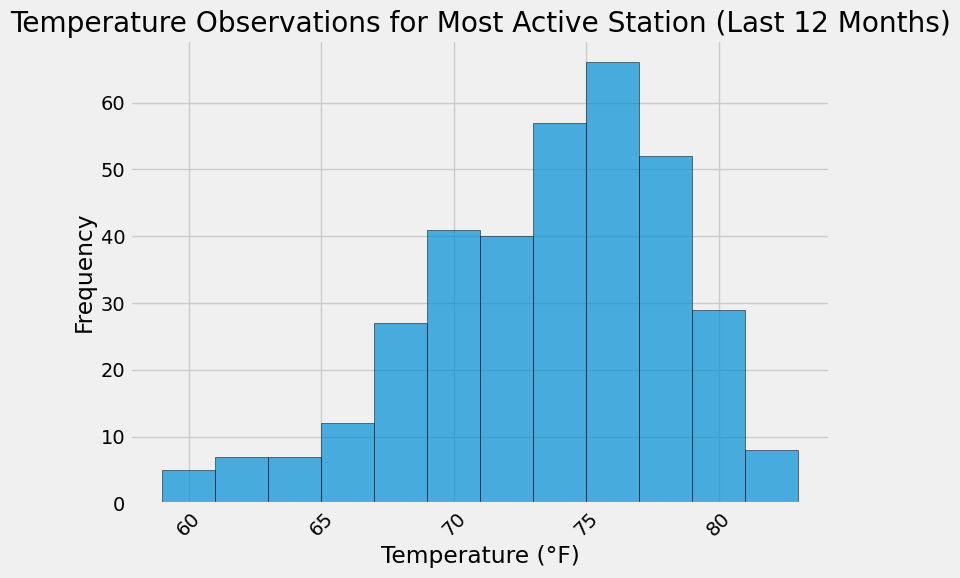

In [24]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

import matplotlib.pyplot as plt
import pandas as pd

# Determine the most recent date in the dataset
most_recent_date = session.query(func.max(Measurement.date)).scalar()

# Calculate the date one year ago from the most recent date
one_year_ago = dt.datetime.strptime(most_recent_date, '%Y-%m-%d') - dt.timedelta(days=365)

# Design a query to retrieve the temperature observations for the most active station within the specified date range
temperature_data = session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.station == most_active_station).\
    filter(Measurement.date >= one_year_ago).all()

# Create a DataFrame from the query results
df = pd.DataFrame(temperature_data, columns=["Date", "Temperature"])

# Set the Date column as the index
df.set_index("Date", inplace=True)

# Sort the DataFrame by date
df.sort_index(inplace=True)

# Plot the temperature observations as a histogram
plt.figure(figsize=(8, 6))
plt.hist(df["Temperature"], bins=12, edgecolor="black", alpha=0.7)
plt.xlabel("Temperature (°F)")
plt.ylabel("Frequency")
plt.title("Temperature Observations for Most Active Station (Last 12 Months)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Close Session

In [25]:
# Close Session
session.close()